# **Trabalho 1 - PAC MAN**

Autores:



# Introdução

O presente relatório apresenta a descrição das estratégias adotadas para a resolução do Projeto 1 da disciplina Introdução à Inteligência Artificial, ministrada no primeiro semestre de 2020 pela professora Dra. Esther Luna Colombini.

De acordo com a exigência do projeto, o grupo deveria modelar o jogo "Pac Man" com base em técnicas de computação evolutiva, avaliando essa solução de acordo com diversos parâmetros.

In [1]:
# Código Inicial

# Problemática e Contextualização

Esta obra trata de levar a IA para o personagem "come come" do jogo Pac Man. Este é um jogo no qual existem  dois  tipos de  personagens: o “come come”, com o objetivo de percorrer todo o cenário comendo as bolinhas / pilulas do ambiente sem ser pego pelos fantasmas, chegando até o ponto de objetivo. Por sua vez, os fantasmas, cujo objetivo é alcançar o “come come” se colocando na mesma posição que este no cenário. O jogo acaba em duas situações: “come come” é atingido, ou atinge, os fantasmas e perde; ou percorre todo o cenário e vence o jogo. O “come come” não consegue atravessar as “paredes” do cenário, sempre prefere caminhos aonde tenham pílulas para ele consumir e tem preferência por não percorrer espaços vazios, sempre evitando-os.


# Metodologia e Ferramentas

Nesta problemática, em específico, os fantasmas são imóveis e o labirinto é construído em um arquivo separado chamado 'maze.in'. O seu desenho pode ser bastante customizado em termos de dimensões e layout interno, desde que respeite condições específicas como: possibilitar pelo menos um caminho para a vitória do “come come”, possuir suas bordas / limites totalmente fechados e possuir única e exclusivamente os seguintes caracteres em sua composição:

- '.': pílulas / bolinhas (que contam como valor 1);
- '@': “come come”;
- '&': fantasma;
- ' ': espaços vazios;
- '$': objetivo;
- '+': caminho percorrido pelo agente inteligente;

A regra do jogo já está contida dentro dos próprios algoritmos de busca. Basicamente o “come come” deve evitar três elementos, por razões diferentes:

- '#': parede, por não conseguir atravessar;
- '&': fantasma, pois imputa a derrota ao “come come”;
- ' ': espaço vazio, por não conseguir percorrer espaços vazios;

Quaisquer caracteres diferente disso ocasionará erro e será retornada a seguinte mensagem: "Não há caminho". Essa mesma mensagem será retornada caso a busca também não encontre caminho.

Segue abaixo um exemplo de mapa utilizado nas buscas inteligentes implementadas:

<img src="ImagensIA/mapa.png">

Dado o mapa, durante a instanciação, o agente deve ler o mapa e capturar as posições inicial e final, no arquivo 'main'. Isso não quer dizer que o layout do mapa será descartado. Ele ainda servirá de apoio durante a busca pelo melhor caminho. Além disso, as dimensões do mesmo serão uteis futuramente. 

Sendo o “come come” o único elemento móvel neste cenário, deverão ser implementados cinco tipos de métodos inteligentes, sendo eles: dois métodos de busca sem informação, dois métodos de pesquisa informada de heurísticas distintas e um método de busca local.

O maior desafio a ser transposto nesta obra é que, uma vez desconhecido pelo agente, o cenário deve ser percorrido de forma otimizada todo levando em consideração que este o agente inteligente (“come come”) pode encontrar um dos três fantasmas e, caso isso aconteça, todo o plano de varredura de cenário definido pela inteligência artificial deve ser modificado.


# Estrutura

Ainda durante a fase de construção, o agente usará de uma classe importante chamada No, localizado em 'tools/estrutura_dados'. 

Essa classe será utilizada durante as buscas. Esta utiliza os caracteres do mapa e os representar como um nó de um grafo, com os seguintes componentes:

- A “posição atual” com as coordenadas x e y;
- O elemento “pai” como o nó de origem;
- A variável “G” como a distância do agente em relação ao nó inicial;
- A variável “H” como a distância do agente em relação ao nó final (esse campo, durante a busca informada, conterá o valor calculado pela heurística);
-  A variável “F” como o custo total para o agente percorrer o percurso (inicio – fim);

Neste caso, o melhor cenário seria o agente calcular o menor caminho, sem fantasmas ou espaços para atrapalhá-lo. Já no pior cenário, além dos fantasmas e espaços durante o trajeto, o calculo do objetivo '$' pode ter levado o “come come” para caminhos de maior gasto ou, ainda pior, o objetivo pode estar envolto de espaços vazios, ou seja, impossibilidade de término do trajeto.

Ao final da execução do algoritmo de busca, o mapa é mostrado na tela, com o carácter '+' representando o caminho percorrido pelo “come come”, além da lista de nós visitados na forma de coordenadas (x,y) e o custo total do caminho.

# Algoritmos de Busca Inteligente

Conforme explanado inicialmente deverão ser implementados dois métodos de busca sem informação, dois métodos de pesquisa informada de heurísticas distintas e um método de busca local. Segue abaixo os algoritmos eleitos para a resolução da problemática “Pac Man” de acordo com a proposta.

O algoritmo A* (também denominado “A-estrela”)  foi uma das opções usadas para resolver a problemática do Pac Man.  Este algoritmo utiliza o custo do caminho completo, o custo para o nó inicial e o custo estimado para o nó de objetivo no calculo heurístico. Neste modelo a heurística adotada para orientar a pesquisa é a “Distância de Manhattan”.  O A* inicia a partir do nó inicial, expande-se à todos os vizinhos e atualiza o custo do caminho completo, respectivamente. Este seleciona o vizinho com o menor custo e repete o processo até encontrar o nó de objetivo. 

No caso deste trabalho em específico esse processo foi realizado pelo A* classificando a lista de nós abertos em ordem crescente e escolhendo o menos custoso. O seu funcionamento se dá da seguinte forma:

- Criação de listas para nós abertos e nós fechados (aberto, fechado);
- Criação de um nó inicial e um nó de objetivo, utilizando a classe “No”;
- Adição do nó inicial na lista aberta;
- Executar laço de repetição da condição anterior até que a lista aberta esteja vazia;
- Ordenação da lista aberta para obter o nó com o menor custo primeiro;
- Obtenção do nó com o menor custo;
- Adicionar o nó atual à lista fechada, ou seja, que não será mais visitado;
- Descompactação da posição atual do nó;
- Obtenção os vizinhos adjacentes;
- Executar o mesmo laço de repetição inicial nos vizinhos;
- Obtenção do valor do mapa;
- Verificar se o nó é o objetivo. Caso sim, encerrar. Caso não, prosseguir com próximo passo;
- Verificar se o nó é uma parede ('#'), um fantasma ('&') ou um espaço em branco (' '). Caso sim, os mesmos devem ser ignorados e o algoritmo deve considerar uma opção alternativa;
- Criar um nó vizinho com a classe “No”;
- Verificar se o vizinho está na lista fechada. Caso sim, verificar a disponibilidade de outro vizinho;
- Gerar heurística “Distância de Manhattan”;
- Verificar se o vizinho está na lista aberta e se ele tem um valor f (custo total) menor. Caso sim, adicionar o vizinho à lista aberta;
- Ao final da iteração dos vizinhos, verificar se a meta foi atingida. Caso sim, retorne o caminho realizado na tela. Senão, retorne vazio com a mensagem "Não há caminho";

A * é completo e ideal para a resolução deste problema. O algoritmo encontra o caminho mais curto para a meta. A complexidade do tempo é O (n) em uma grade e O (b^d) em um grafo/árvore com um fator de ramificação (b) e uma profundidade (d). O fator de ramificação é o número médio de nós vizinhos que podem ser expandidos a partir de cada nó e a profundidade é o número médio de níveis em um grafo/árvore.

## Best-first search (BFS) 

Best-first search (BFS) é muito semelhante ao A*. O algorítimo também utiliza heurística da “Distância de Manhattan”, sem superestimar o custo da meta. O BFS começa a trajetória em um nó inicial e atualiza os nós vizinhos com uma estimativa do custo para o nó do objetivo. Para isso, o algoritmo seleciona a vizinhança com o menor custo e continua a expandir os nós até atingir o nó da meta, favorecendo nós que estão próximos ao nó de objetivo. Nesta problemática o BFS foi implementado classificando a lista de nós abertos em ordem crescente. 

A única diferença entre o BFS com o A*  é que o custo total (“F”) recebe apenas o valor da heurística calculada (enquanto na A* o custo total (“F”) recebe a soma da distância do nó inicial com o valor da heurística). O seu funcionamento se dá da seguinte forma:

- Criação de listas para nós abertos e nós fechados (aberto, fechado);
- Criação de um nó inicial e um nó de objetivo, utilizando a classe “No”;
- Adição do nó inicial na lista aberta;
- Executar laço de repetição da condição anterior até que a lista aberta esteja vazia;
- Ordenação da lista aberta para obter o nó com o menor custo primeiro;
- Obtenção do nó com o menor custo;
- Adicionar o nó atual à lista fechada, ou seja, que não será mais visitado;
- Descompactação da posição atual do nó;
- Obtenção os vizinhos adjacentes;
- Executar o mesmo laço de repetição inicial nos vizinhos;
- Obtenção do valor do mapa;
- Verificar se o nó é o objetivo. Caso sim, encerrar. Caso não, prosseguir com próximo passo;
- Verificar se o nó é uma parede ('#'), um fantasma ('&') ou um espaço em branco (' '). Caso sim, os mesmos devem ser ignorados e o algoritmo deve considerar uma opção alternativa;
- Criar um nó vizinho com a classe “No”;
- Verificar se o vizinho está na lista fechada. Caso sim, verificar a disponibilidade de outro vizinho;
- Gerar heurística “Distância de Manhattan”;
- Ao final da iteração dos vizinhos, verificar se a meta foi atingida. Caso sim, retorne o caminho realizado na tela. Senão, retorne vazio com a mensagem "Não há caminho";

 O BFS tem uma complexidade do tempo de O (n) em uma grid e O (b^d) em um grafo/árvore com um fator de ramificação (b) e uma profundidade (d). 

## Busca em Largura

A busca em largura é um algoritmo desinformado, que busca cegamente em direção a uma meta abrangente. A BFS inicia a partir de um nó inicial (start) e expande os nós vizinhos na amplitude, isso é implementado usando uma fila FIFO (First In First Out). O BFS é completo, pois não ficará preso em um loop infinito se houver um nó de objetivo no espaço de pesquisa.

A busca em largura encontra a solução ideal, mas isso pode levar tempo e consumir muita memória. A complexidade do tempo é O (n) em um mapa e O (b^d) em um grafo/árvire com um fator de ramificação (b) e uma profundidade (d). A BFS não é tão eficiente em termos de memória quanto a pesquisa profunda em árvores. A BFS pode ser usado se o espaço de pesquisa não for muito grande e quando for importante encontrar uma solução ideal.

1 Criar listas para nós abertos e nós fechados
2 Crie um nó inicial e um nó de objetivo
3 Adicione o nó inicial
4 Repetir até que a lista aberta esteja vazia
5 Obter o primeiro nó (FIFO)
6 Adicione o nó atual à lista fechada
7 Verifique se atingimos a meta
8 Descompacte a posição atual do nó
9 Obter vizinhos
10 Loop vizinhos
11 Obter valor do mapa
12 Verifique se o nó é uma parede, um fantasma ou um espaço em branco
13 Crie um nó vizinho
14 Verifique se o vizinho está na lista fechada
15 Adicione o nó, se não estiver aberto
16 Retorne o caminho


## DFS (Busca em Profundidade)

A busca em profundidade (DFS) começa em um nó raiz e expande os nós vizinhos em profundidade até atingir um nó de objetivo. Isso é implementado usando uma fila LIFO (Last In First Out). A pesquisa em profundidade pode ser repetida para sempre se o espaço de pesquisa for infinito e o nó da meta não estiver na profundidade do caminho de pesquisa atual. Um algoritmo DFS pode ignorar muitos nós se atingir o fim na profundidade de uma árvore e, portanto, é mais eficiente em termos de memória do que a primeira pesquisa em alguns casos.

Não é garantido que a busca em profundidade encontre a solução ideal e, na pior das hipóteses, consome muito tempo. A complexidade do tempo é O (n) em um mapa e O(b^d) em um grafo com um fator de ramificação (b) e uma profundidade (d). O DFS e as variantes do algoritmo são usados nas pesquisas de IA porque são eficientes em termos de memória em comparação com outros algoritmos de pesquisa.

1 Criar listas para nós abertos e nós fechados
2 Crie um nó inicial e um nó de objetivo
3 Adicione o nó inicial
4 Repetir até que a lista aberta esteja vazia
5 Obter o primeiro nó (LIFO)
6 Adicione o nó atual à lista fechada
7 Verifique se atingimos a meta
8 Descompacte a posição atual do nó
9 Obter vizinhos
10 Loop vizinhos
11 Obter valor do mapa
12 Verifique se o nó é uma parede, um fantasma ou um espaço em branco
13 Crie um nó vizinho
14 Verifique se o vizinho está na lista fechada
15 Adicione o nó, se não estiver aberto
16 Retorne o caminho

A implementação é semelhante a Busca em Largura, com a diferença que no passo 5 o DFS implementa uma Fila e a Busca em Largura implementa uma pilha.


## XXXXXX

Algoritmo é baseado em 7 parâmetro. O mapa para saber o conteúdo da sua localização, inicio para saber a posição inicial, fim para saber posição objetivo, T0 que é a variável temperatura que define a probabilidade de dar o passo ou não(Se está próximo ou não), N tamanho de vizinhos a mais para explorar, alpha o fator que decrementa a temperatura e k o tamanho do passo.

Definimos uma variável path para guardar o histórico de posição que algoritmo passa. Ele começa definindo posição inicial e final. O algoritmo executa enquanto a variável temperatura não se esgota ou até achar o objetivo. Ele define duas variáveis aleatório para definir se vai testar um dos sentidos para cima, baixo, esquerda ou direita. Depois ele calcula com uma função custo o quanto distante ele está do objetivo e onde ele estava e calcula se ele deve ou não dar aquele passo. Ele explora mais N vezes decrementa temperatura para diminuir a probabilidade de dar o passo. E continua até chegar no objetivo.A função probabilidade é dado por prob = 1/(e^(prox_local-local_atual)/T0)
 Quanto maior T0, maior chance de ele dar o passo seguindo um dos critérios. Critério são. O cálculo da função custo diminui erro, ele vai fazer o passo, se ele tem dúvida ele calcula a probabilidade usando a função acima e se a probabilidade for maior que 50% ele dá o passo(Significa que ele está longe). Caso contrário ele não da o passo.T0 serve como termômetro no começo ele está longe e precisa dar o passo no final ele estará perto então precisa testar várias posições. O problema que esse algoritmo tem vários hiperparametro vantagem que ele não precisa de todo mapa, se adapta facilmente a mudança de cenário.


# Teste de Execução

In [1]:
import numpy as np
from PIL import Image
from scipy import misc
import sys
import imageio
import math

# Visualizações
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


import pandas as pd
import pandas as pd

from skimage import exposure

from scipy import misc

In [1]:
import numpy as np
from PIL import Image
from scipy import misc
import sys
import imageio
import math

# Visualizações
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


import pandas as pd
import pandas as pd

from skimage import exposure

from scipy import misc

(512, 512)
uint8


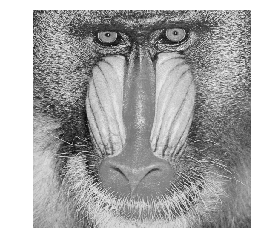

In [2]:

#Visualização de uma imagem exemplo

image = imageio.imread('Images/baboon.png')
print (image.shape)
print (image.dtype)

fig = plt.figure()

a=fig.add_subplot(1,1,1)
imgplot = plt.imshow(image, cmap='gray')
plt.axis('off')

plt.show()


**1.1 Ajuste de Brilho**<br /><br />
Aplicar a correc¸ao gama para ajustar o brilho de uma imagem monocrom ˜ atica ´ A de entrada
e gerar uma imagem monocromatica ´ B de sa´ıda. A transformac¸ao pode ser realizada (a) ˜
convertendo-se as intensidades dos pixels para o intervalo de [0, 255] para [0, 1], (b) aplicando-se
a equac¸ao˜ B = A(1/γ) e (c) convertendo-se de volta os valores resultantes para o intervalo [0, 255].

In [3]:
###
#
# Função Correcao Gama
#
###

def gama_function(A, gama):            
                
        A_norm = A/255
        B = pow(A_norm, 1/gama)
        B_Norm = B*255
        return B_Norm
        
    

**Função Gama** <br /><br />

A função gama é **$B = A^{(1/γ)}$** onde B é a imagem de saída e A a imagem de entrada. Para realizar a transformação gama o valor dos pixels deve ser normalizado no intervalo [0,1]. No gráfico a seguir conseguimos visualizar o comportamento da função nesse intervalo:

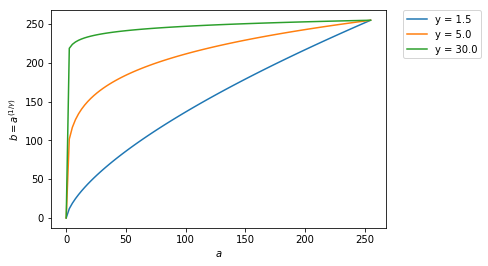

In [4]:
###
#
# Comportamento da funçao gama.
#
###

x = np.linspace(0, 255, 100) # 100 pontos de 0 a 1.

plt.figure()

# Curvas com variação de gama
gama = 1.5
plt.plot(x, gama_function(x, gama), label="y = 1.5")

gama = 5.0
plt.plot(x, gama_function(x, gama), label="y = 5.0")

gama = 30.0
plt.plot(x, gama_function(x, gama), label="y = 30.0")

# Informações do gráfico
plt.xlabel('$a$')
plt.ylabel('$b = a^{(1/γ)}$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

Considerando 0 como o nivel de cinza de uma pixel preto e 1 o nível de cinza de uma pixel branco. É esperado que a função gama torne os pixels mais claros, e que valores mais altos de gama significam maior incremento em pixels de valores mais baixos. Em outras palavras, valores altos de gama deixaram mais claros pixels os mais escuros. Pelos valores de gama plotados no gráfico percebemos que gama = 30.0 deixaria a imagem praticamente branca.

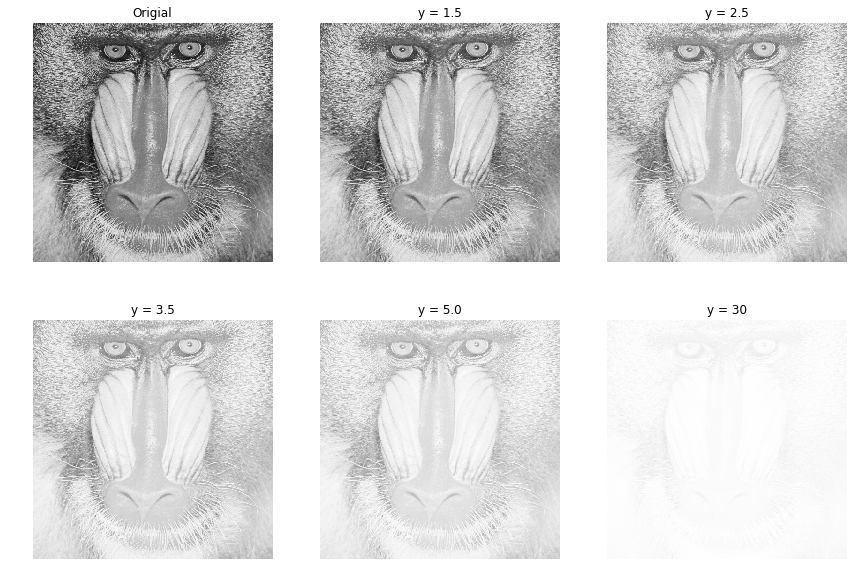

In [5]:
##
#
# Primeiro experimento Ajuste de Brilho - Variação do fator gama
# 
##

image = imageio.imread('/home/maisa/Documentos/MO443/Trabalho_0/Images/baboon.png')

fig = plt.figure(figsize=(30,20))

#Original
a=fig.add_subplot(2,6,1)
imgplot = plt.imshow(image, cmap='gray')
a.set_title("Origial")
plt.axis('off')

# y = 1.5
a=fig.add_subplot(2,6,2)
imgplot = plt.imshow(gama_function(image, 1.5), cmap='gray')
a.set_title("y = 1.5")
plt.axis('off')

# y = 2.5
a=fig.add_subplot(2,6,3)
imgplot = plt.imshow(gama_function(image, 2.5), cmap='gray')
a.set_title("y = 2.5")
plt.axis('off')

# y = 3.5
a=fig.add_subplot(1,6,1)
imgplot = plt.imshow(gama_function(image, 3.5), cmap='gray')
a.set_title("y = 3.5")
plt.axis('off')

# y = 5.0
a=fig.add_subplot(1,6,2)
imgplot = plt.imshow(gama_function(image, 5), cmap='gray')
a.set_title("y = 5.0")
plt.axis('off')

# y = 30
a=fig.add_subplot(1,6,3)
imgplot = plt.imshow(gama_function(image, 30), cmap='gray')
a.set_title("y = 30")
plt.axis('off')

plt.show()

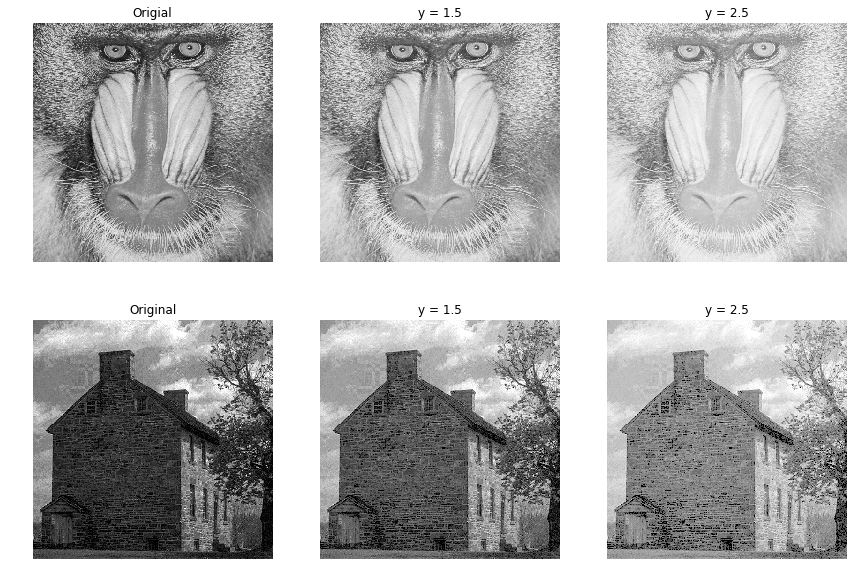

In [6]:
##
#
# Segundo experimento Ajuste de Brilho - Comparação de imagens orignais clara vs escura
# 
##

image_clara = imageio.imread('/home/maisa/Documentos/MO443/Trabalho_0/Images/baboon.png')
image_escura = imageio.imread('/home/maisa/Documentos/MO443/Trabalho_0/Images/house.png')

fig = plt.figure(figsize=(30,20))

#Original Clara
a=fig.add_subplot(2,6,1)
imgplot = plt.imshow(image_clara, cmap='gray')
a.set_title("Origial")
plt.axis('off')

# Clara y = 1.5
a=fig.add_subplot(2,6,2)
imgplot = plt.imshow(gama_function(image_clara, 1.5), cmap='gray')
a.set_title("y = 1.5")
plt.axis('off')

# Clara y = 2.5
a=fig.add_subplot(2,6,3)
imgplot = plt.imshow(gama_function(image_clara, 2.5), cmap='gray')
a.set_title("y = 2.5")
plt.axis('off')

# Original Escura
a=fig.add_subplot(1,6,1)
imgplot = plt.imshow(image_escura, cmap='gray')
a.set_title("Original")
plt.axis('off')

# Escura y = 1.5
a=fig.add_subplot(1,6,2)
imgplot = plt.imshow(gama_function(image_escura, 1.5), cmap='gray')
a.set_title("y = 1.5")
plt.axis('off')

# Escura y = 2.5
a=fig.add_subplot(1,6,3)
imgplot = plt.imshow(gama_function(image_escura, 2.5), cmap='gray')
a.set_title("y = 2.5")
plt.axis('off')

plt.show()

Nesse segundo experimento podemos perceber que o equilíbrio correto do brilho melhora a visualização de detalhes da imagem. Corrigindo regiões de sombra, por exemplo.

** 1.2 Planos de Bits ** <br /><br />
Extrair os planos de bits de uma imagem monocromatica. Os n ´ ´ıveis de cinza de uma imagem
monocromatica com ´ m bits podem ser representados na forma de um polinomio de base 2: ˆ
am−1 2
m−1 + am−2 2
m−2 + . . . + a1 2
1 + a0 2
0
(1)
O plano de bits de ordem 0 ´e formado pelos coeficientes a0 de cada pixel, enquanto o plano
de bits de ordem m − 1 ´e formado pelos coeficientes am−1

** Plano de Bits **

Plano de Bits é a representação binária de uma imagem conforme os coeficientes de uma determinada potência de 2. Para obter um plano de bit devemos transforma o valor de todos os pixels para a base 2, binária, e então escolher o plano (potência de 2) quer será considerada, e os cofecientes dessa potência será o meu plano de bit. 

A função *numpy.unpackbits(myarray)* da biblioteca Numpy realiza a transformação de um inteiro sem sinal de 8 bits, uint8 em número na base 2.

A função *numpy.packbits(myarray)* da biblioteca Numpy realiza a transformação de um número na base 2 em um inteiro sem sinal de 8 bits, uint8.

Mais detalhes sobre essas funções podem ser obtidos na documentação da biblioteca Numpy:

https://docs.scipy.org/doc/numpy/reference/generated/numpy.unpackbits.html
https://docs.scipy.org/doc/numpy/reference/generated/numpy.packbits.html#numpy.packbits


In [7]:
# Função de Extração do Plano de Bits

def bits_plane_function(A, ordem):            

        A_ui8 = A.astype(np.uint8)        
        B = np.unpackbits(A_ui8)
        B.shape = (A.shape[0],A.shape[1],8)        
        return B[:,:,7-ordem]
    

(10, 10)


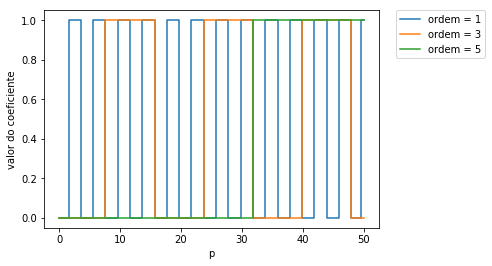

In [8]:
###
#
# Comportamento da funçao plane bits.
#
###

x_vector = np.linspace(0, 50, 100) # 100 pontos de 0 a 50.
x_matrix = np.array(x_vector, copy=True)
x_matrix.shape = (10,10)

plt.figure()

# Informações do gráfico
ordem = 1
plane_matrix = bits_plane_function(x_matrix, ordem);
plane_vector = np.array(plane_matrix, copy=True)
print(plane_vector.shape)
plane_vector.shape = (100)
plt.step(x_vector, plane_vector, label="ordem = 1")

ordem = 3
plane_matrix = bits_plane_function(x_matrix, ordem);
plane_vector = np.array(plane_matrix, copy=True)
plane_vector.shape = (100)
plt.step(x_vector, plane_vector, label="ordem = 3")

ordem = 5
plane_matrix = bits_plane_function(x_matrix, ordem);
plane_vector = np.array(plane_matrix, copy=True)
plane_vector.shape = (100)
plt.step(x_vector, plane_vector, label="ordem = 5")

plt.xlabel('p')
plt.ylabel('valor do coeficiente')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



Ao visualizar os valores dos coeficientes para cada ordem, percebemos que ordens maiores apresentam uma variação menor do coeficiente, e que o primeiro valor 1 é posterior a ordens menores.

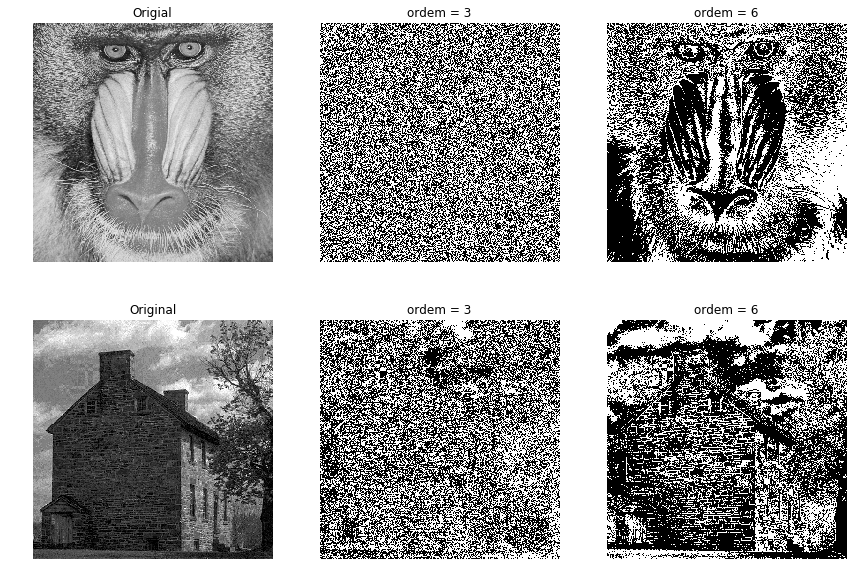

In [9]:
image_clara = imageio.imread('/home/maisa/Documentos/MO443/Trabalho_0/Images/baboon.png')
image_escura = imageio.imread('/home/maisa/Documentos/MO443/Trabalho_0/Images/house.png')

fig = plt.figure(figsize=(30,20))

#plane_matrix = bits_plane_function(x_matrix, ordem);
#Original Clara
a=fig.add_subplot(2,6,1)
imgplot = plt.imshow(image_clara, cmap='gray')
a.set_title("Origial")
plt.axis('off')

# Clara ordem = 3
a=fig.add_subplot(2,6,2)
imgplot = plt.imshow(bits_plane_function(image_clara, 1), cmap='gray')
a.set_title("ordem = 3")
plt.axis('off')

# Clara ordem = 6
a=fig.add_subplot(2,6,3)
imgplot = plt.imshow(bits_plane_function(image_clara, 6), cmap='gray')
a.set_title("ordem = 6")
plt.axis('off')

# Original Escura
a=fig.add_subplot(1,6,1)
imgplot = plt.imshow(image_escura, cmap='gray')
a.set_title("Original")
plt.axis('off')

# Escura ordem = 3
a=fig.add_subplot(1,6,2)
imgplot = plt.imshow(bits_plane_function(image_escura, 3), cmap='gray')
a.set_title("ordem = 3")
plt.axis('off')

# Escura ordem = 6
a=fig.add_subplot(1,6,3)
imgplot = plt.imshow(bits_plane_function(image_escura, 6), cmap='gray')
a.set_title("ordem = 6")
plt.axis('off')

plt.show()

O resultado obtido nos mostra que ordem maiores de coeficiente trazem melhor informações sobre o conteúdo da imagem, uma vez que eles são um limiar entre pixels claros ou escuros. O resultado desse experimento difere do apresentado no trabalho, provavelmente porque o do trabalho calcula o valor do pixel através da transformada do número na base 2 para a base 8 novamente, considerando assim todos os coeficientes menores.

** 1.3 Mosaico** <br /><br />
Construir um mosaico de 4 × 4 blocos a partir de uma imagem monocromatica. A disposic¸ ´ ao dos ˜
blocos deve seguir a numerac¸ao mostrada na figura (c).

O Mosaico de uma imagem é obtido pela translação de regiões da image. Perde-se assim informações dependentes da características espaciais dos pixels.

In [10]:
##
#
# Função do Mosaico
#
##

def mosaico_function(A, map_mosaic):
        
        B = np.zeros(A.shape, dtype=A.dtype)
        
        delta = int(math.sqrt(len(map_mosaic)))
        delta_x = A.shape[0] // delta
        delta_y = A.shape[1] // delta
        
        for k in range(len(map_mosaic)):
            
            ini_dest_x = (k // delta) * delta_x
            ini_dest_y = (k % delta) * delta_y            

            ini_origem_x = ((map_mosaic[k] - 1) // delta)  * delta_x
            ini_origem_y = ((map_mosaic[k] - 1) % delta) * delta_y
            
            B[ini_dest_x : ini_dest_x + delta_x, ini_dest_y : ini_dest_y + delta_y] = A[ini_origem_x : ini_origem_x + delta_x, ini_origem_y : ini_origem_y + delta_y]
            
               
        return B

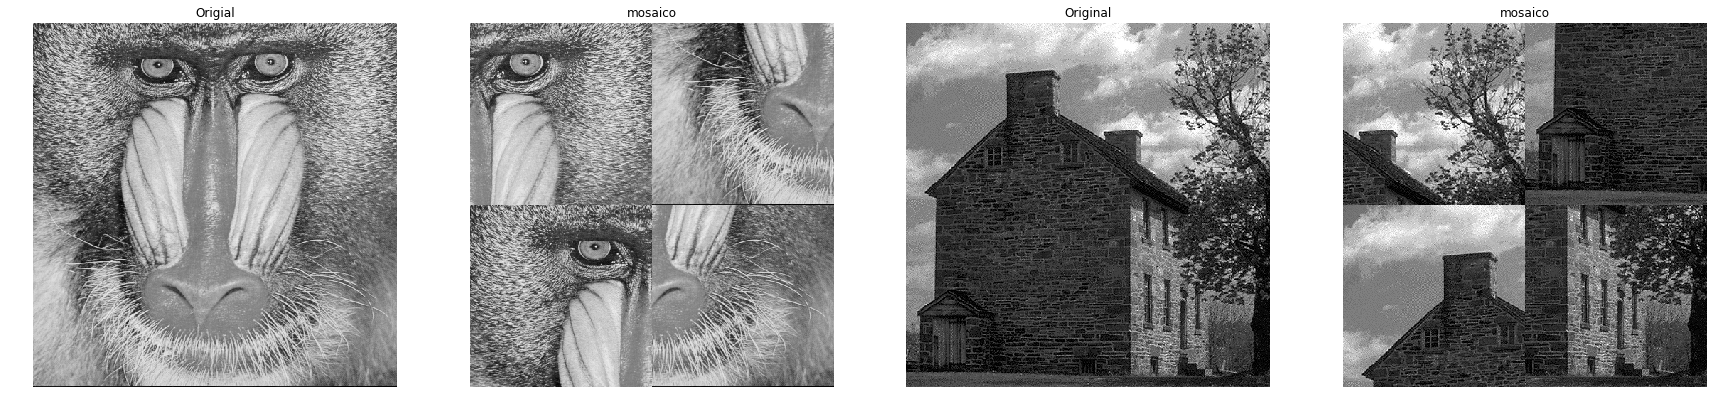

In [11]:
image_clara = imageio.imread('/home/maisa/Documentos/MO443/Trabalho_0/Images/baboon.png')
image_escura = imageio.imread('/home/maisa/Documentos/MO443/Trabalho_0/Images/house.png')

#map_mosaic =   [6, 11, 13, 3, 8, 16, 1, 9, 12, 14, 2, 7, 4, 15, 10, 5]        
map_mosaic =   [2,3,1,4]

fig = plt.figure(figsize=(30,20))

#Original Clara
a=fig.add_subplot(1,4,1)
imgplot = plt.imshow(image_clara, cmap='gray')
a.set_title("Origial")
plt.axis('off')

# Clara ordem = 3
a=fig.add_subplot(1,4,2)
imgplot = plt.imshow(mosaico_function(image_clara, map_mosaic), cmap='gray')
a.set_title("mosaico")
plt.axis('off')

# Original Escura
a=fig.add_subplot(1,4,3)
imgplot = plt.imshow(image_escura, cmap='gray')
a.set_title("Original")
plt.axis('off')

# Escura ordem = 3
a=fig.add_subplot(1,4,4)
imgplot = plt.imshow(mosaico_function(image_escura, map_mosaic), cmap='gray')
a.set_title("mosaico")
plt.axis('off')


plt.show()

** 1.4 Combinac¸ao de Imagens ** <br /><br />
Combinar duas imagens monocromaticas de mesmo tamanho por meio da m ´ ´edia ponderada de
seus n´ıveis de cinza.

In [12]:
##
#
# Função do Soma Imagens
#
##

def sum_img_function(A, B, w_A, w_B):
               
        return w_A*A + w_B*B

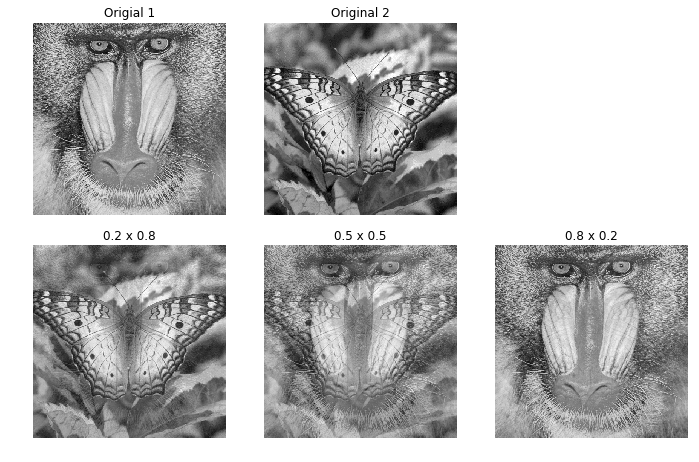

In [13]:
image_clara = imageio.imread('/home/maisa/Documentos/MO443/Trabalho_0/Images/baboon.png')
image_escura = imageio.imread('/home/maisa/Documentos/MO443/Trabalho_0/Images/butterfly.png')

fig = plt.figure(figsize=(20,15))

#Original Clara
a=fig.add_subplot(2,5,1)
imgplot = plt.imshow(image_clara, cmap='gray')
a.set_title("Origial 1")
plt.axis('off')

# Clara ordem = 3
a=fig.add_subplot(2,5,2)
imgplot = plt.imshow(image_escura, cmap='gray')
a.set_title("Original 2")
plt.axis('off')

# Original Escura
a=fig.add_subplot(1,5,1)
imgplot = plt.imshow(sum_img_function(image_clara, image_escura, 0.2 , 0.8), cmap='gray')
a.set_title("0.2 x 0.8")
plt.axis('off')

# Escura ordem = 3
a=fig.add_subplot(1,5,2)
imgplot = plt.imshow(sum_img_function(image_clara, image_escura, 0.5 , 0.5), cmap='gray')
a.set_title("0.5 x 0.5")
plt.axis('off')

# Escura ordem = 3
a=fig.add_subplot(1,5,3)
imgplot = plt.imshow(sum_img_function(image_clara, image_escura, 0.8 , 0.2), cmap='gray')
a.set_title("0.8 x 0.2")
plt.axis('off')


plt.show()